# importing the libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## loading the data

In [2]:
Boston=pd.read_csv('boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Obtaining some statistical information from the dataset

In [3]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Rename columns for better understanding

In [4]:
Boston=Boston.rename(columns={'MEDV':'PRICE'})
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### To know tha number of columns and rows in the dataset

In [5]:
Boston.shape

(506, 14)

### To know the column names in the datset

In [6]:
Boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

### To know the missing values 

In [7]:
Boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
Boston.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   

### To know the data types

In [11]:
Boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

Machine Learning 

To obtain input and target varible

In [12]:
inputs=Boston.drop('PRICE',axis='columns')
target=Boston.PRICE
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

### Training the model

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

### Linear Regression

In [14]:
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
reg.predict(X_test)

array([ 2.99622856e+01,  5.65438115e+00,  2.07936706e+01,  2.85536449e+01,
        2.11242808e+01,  2.12413333e+01,  8.32525316e+00,  2.09178268e+01,
        1.24569012e+01,  2.05161661e+01,  2.42804544e+01,  1.72424523e+01,
        7.55002123e+00,  2.30996281e+01,  1.59812465e+01,  1.10510200e+01,
        1.99996590e+01,  2.26483128e+01,  3.33741073e+01,  3.86418019e+01,
        1.92018704e+01,  1.91864238e+01,  3.02638025e+01,  4.21067256e+01,
        2.34575362e+01,  3.13377302e+01, -5.94932824e-01,  1.80008129e+01,
        2.09612383e+01,  1.10927183e+01,  2.47512987e+01,  1.61617139e+01,
        2.06912891e+01,  1.38401535e+01,  2.14749708e+01,  2.34103684e+01,
        9.03729897e+00,  2.22928403e+01,  1.76946937e+01,  1.19157952e+01,
        1.68292679e+01,  2.43890180e+01,  2.31781224e+01,  1.31315139e+01,
        7.95054442e+00,  1.55126093e+01,  1.42243613e+01,  2.49380375e+01,
        3.61052925e+01,  8.82645687e+00,  2.50284534e+01,  2.05841079e+01,
        1.19859849e+01,  

### Value of the coefficent

In [16]:
reg.coef_

array([-1.22356810e-01,  4.40315206e-02,  2.50909630e-02,  3.54027627e+00,
       -1.65704794e+01,  4.23278421e+00, -8.83411133e-03, -1.54467138e+00,
        2.79611833e-01, -9.06850369e-03, -9.02663309e-01,  1.39536106e-02,
       -5.36484980e-01])

### Value of the intercept

In [17]:
reg.intercept_

30.439504242532777

In [19]:
# Model prediction on train data
y_pred=reg.predict(X_train)
y_pred

array([40.49886347, 22.75979545, 33.0976474 , 24.89643242, 30.11709587,
       34.46110536, 28.54604457, 41.25152949, 20.97382052, 22.0083118 ,
       24.29703833, 20.5837936 , 30.31179574, 30.45229161, 22.25308161,
       21.18521946, 20.53342303, 23.04239439, 20.82546856, 17.85799434,
       23.82610333, 19.33997364, 25.11447785, 30.94316439, 15.75874787,
       28.80427897, 34.62617106, 36.28776901, 43.87660593, 25.36237826,
       14.73401671, 17.10919167,  3.79623527, 22.75307637, 33.38818007,
       18.56517805, 25.60703167, 24.88553795, 26.37073619, 25.27830699,
       28.62834832, 33.6379691 , 25.19304335, 18.9919713 , 28.31660918,
        3.63885848, 14.35829871, 11.17732689, 33.46689479, 25.99957793,
       25.00147912, 13.79889959, 24.00897426, 12.90761481, 14.12471669,
       15.37210997, 18.64303807, 20.12377163, 25.94316746, 22.34456797,
       21.95583005, 26.6898007 , 12.89851418, 13.81000133, 15.084751  ,
       37.07649489, 26.19688411, 34.74161181, 23.47731483, 34.28

### Visualise the difference between the actual and the predicted prices

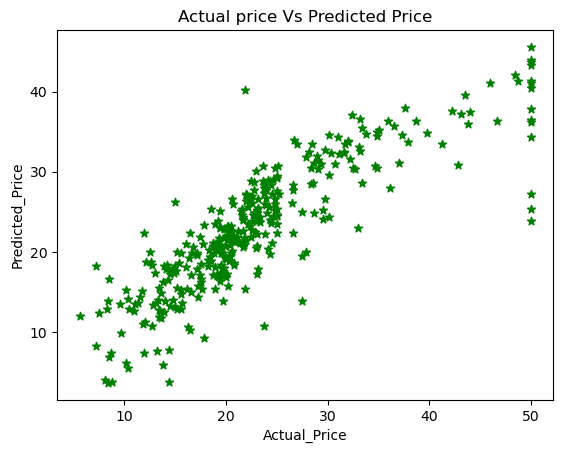

In [25]:
plt.scatter(y_train,y_pred, marker='*',color='green')
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.title('Actual price Vs Predicted Price')
plt.show()            
            

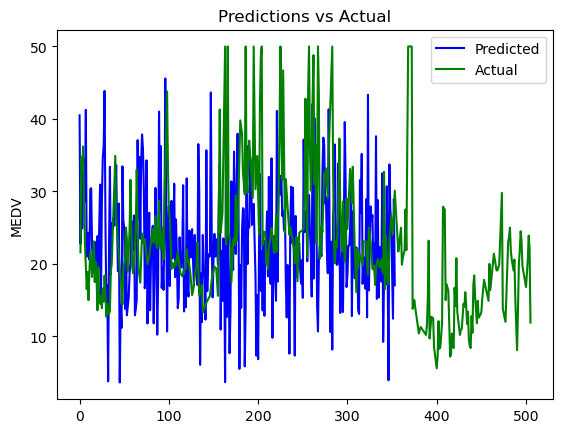

In [32]:
sns.lineplot(y_pred,  color = "blue", label='Predicted')
sns.lineplot(y_train,  color = "Green", label='Actual')
plt.title('Predictions vs Actual')
plt.ylabel('Counts')
plt.legend()
plt.show()

### MODEL EVAUATION

In [35]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7311568708872487
Adjusted R^2: 0.7208775747741141
MAE: 3.439960953042946
MSE: 23.658613699645773
RMSE: 4.864012099043934
